# Multimodal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors, pressure mat and depth camera, user-independently.

## Author(s)
Add your information here

Name: Martti Ilvesmäki

Student number:

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometers (attached to subject's thigh and wrist), pressure mat and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. There are totally 30 subjects in the  dataset, and in this work 25 persons is used as training and validation. Remaining 5 subjects has been given without subject or exercise IDs. Your work is to experiment different fusion methods and exercise classification. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the preprocessed dataset in Moodle.

The project work is divided on following phases:

1. Data exploration and visualization
2. Data preprocessing and feature extraction
3. Feature selection, fusion and model development and evaluation
4. Prediction of the held out test set

You are free to use libraries to do the tasks, for example scikit-learn numpy, matplotlib, etc.. In each phase, you should visualize and analyse the results and document the work to a <b>min 3 - max 10 page report </b>. Nice looking and informative report representing your results and analysis will be part of the grading in addition to actual implementation. Return the notebook together with your report as pdf in Moodle.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Overview of the data

The MEx dataset has been preprocessed into feature files ready for machine learning. The preprocessing extracts statistical features from multi-modal sensor data using sliding time windows and aggregating the information. After feature extraction the data rows (windows) has been shuffled randomly.

### Data Files Provided

#### 1. **mex_features_train.csv**
- **Purpose**: Training and validation dataset with labels (exercise ID)
- **Size**: 25 subjects
- **Subject IDs**: Renumbered from 1 to 25 (anonymized, not original IDs)
- **Contains**: `subject_id`, `exercise`, and all feature columns


#### 2. **mex_features_test_no_labels.csv**
- **Purpose**: Test dataset without labels
- **Size**: 5 subjects, same features as mex_features_train.csv
- **Contains**: ONLY feature columns (no `subject_id` or `exercise`)
- **Use**: Make predictions to data from this file at task 4. <b> DO NOT USE THIS DATA BEFORE TASK 4. </b>

## Data Structure

### Key Columns

1. **subject_id** (only in train data)
   - Training: Values 1-25 (renumbered for anonymization)

2. **exercise** (only in train data)
   - Values: 1-7

3. **Feature columns** (same in all files)
   - Accelerometer features: min,max,mean,std for each axis. ACT = Accelerometer in thigh, ACW = Accelerometer in wrist 
   - Depth camera features: Pixel level mean and std from 12x16 image in vectorized form
   - Pressure mat features: Mean and std from 32x16 pressure mat in vectorized form

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data exploration and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Task 1.</b> (3 Points)

Download the preprocessed data from Moodle. Example code for loading and filtering modalities is provided below.

**Your task:** Explore the dataset and create informative visualizations for your report. Consider the characteristics of each modality, class distributions, data balance, and patterns that might be relevant for classification. Choose visualizations that best communicate your findings.


Training data shape: (4923, 1434)

1. Accelerometer ACT columns (12 features):
   ['act_x_mean', 'act_x_std', 'act_x_min', 'act_x_max', 'act_y_mean', 'act_y_std', 'act_y_min', 'act_y_max', 'act_z_mean', 'act_z_std', 'act_z_min', 'act_z_max']
2. Accelerometer ACW columns (12 features):
   ['acw_x_mean', 'acw_x_std', 'acw_x_min', 'acw_x_max', 'acw_y_mean', 'acw_y_std', 'acw_y_min', 'acw_y_max', 'acw_z_mean', 'acw_z_std', 'acw_z_min', 'acw_z_max']
3. Pressure Mat columns (Only first five, total 1024 features):
   ['pressure_mat_pixel_0_mean', 'pressure_mat_pixel_0_std', 'pressure_mat_pixel_1_mean', 'pressure_mat_pixel_1_std', 'pressure_mat_pixel_2_mean'] ...
4. Depth Camera columns (Only first five, total 384 features):
   ['depth_pixel_0_mean', 'depth_pixel_0_std', 'depth_pixel_1_mean', 'depth_pixel_1_std', 'depth_pixel_2_mean'] ...


['pressure_mat_pixel_0_mean', 'pressure_mat_pixel_0_std', 'pressure_mat_pixel_1_mean', 'pressure_mat_pixel_1_std', 'pressure_mat_pixel_2_mean', 'pressure_

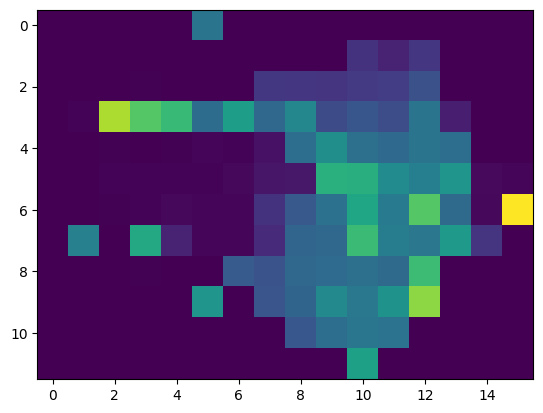

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv('mex_features_train.csv')
print(f"\nTraining data shape: {train_df.shape}")

# Filtering the modalities
acc_act_cols = [col for col in train_df.columns if col.startswith('act_')]
acc_acw_cols = [col for col in train_df.columns if col.startswith('acw_')]
pressure_cols = [col for col in train_df.columns if col.startswith('pressure_mat_')]
depth_cols = [col for col in train_df.columns if col.startswith('depth_')]
print(f"\n1. Accelerometer ACT columns ({len(acc_act_cols)} features):")
print(f"   {acc_act_cols}")
print(f"2. Accelerometer ACW columns ({len(acc_acw_cols)} features):")
print(f"   {acc_acw_cols}")
print(f"3. Pressure Mat columns (Only first five, total {len(pressure_cols)} features):")
print(f"   {pressure_cols[:5]} ...")
print(f"4. Depth Camera columns (Only first five, total {len(depth_cols)} features):")
print(f"   {depth_cols[:5]} ...")

print("\n")
print(f"{pressure_cols} ...")


# Example: Extract only depth camera std features
print("\nExample: Extract only depth camera std features")
depth_std_cols = [col for col in depth_cols if '_std' in col]
print(f"Number of depth camera std features: {len(depth_std_cols)}")
print(f"First 5: {depth_std_cols[:5]}")
# Plot the first image from depth camera std
depth_std_example = train_df[depth_std_cols].iloc[0].values
print("SHAPE : ", depth_std_example.shape)
depth_std_image = depth_std_example.reshape(12, 16)
plt.imshow(depth_std_image, cmap='viridis', aspect='auto')
plt.show()

   subject_id  exercise  act_x_mean  act_x_std  act_x_min  act_x_max  \
0           3         1   -0.652865   0.132935  -0.859375  -0.468750   
1          25         7   -0.661984   0.310596  -1.156250  -0.140625   
2           8         6   -1.000182   0.008614  -1.031250  -0.968750   
3          18         5   -0.235012   0.020838  -0.281250  -0.203125   
4          17         6    0.935429   0.007142   0.890625   0.968750   

   act_y_mean  act_y_std  act_y_min  act_y_max  ...  depth_pixel_188_std  \
0   -0.539319   0.022066  -0.640625  -0.484375  ...         0.000000e+00   
1   -0.508161   0.426187  -1.046875   0.093750  ...         2.220446e-16   
2   -0.127766   0.037614  -0.234375  -0.031250  ...         9.017974e-04   
3   -0.913380   0.017185  -0.968750  -0.875000  ...         3.325842e-04   
4   -0.080227   0.019331  -0.140625   0.000000  ...         3.330669e-16   

   depth_pixel_189_mean  depth_pixel_189_std  depth_pixel_190_mean  \
0              0.960400         0.000000

['subject_id', 'exercise', 'act_x_mean', 'act_x_std', 'act_x_min', 'act_x_max', 'act_y_mean', 'act_y_std', 'act_y_min', 'act_y_max', 'act_z_mean', 'act_z_std', 'act_z_min', 'act_z_max', 'acw_x_mean', 'acw_x_std', 'acw_x_min', 'acw_x_max', 'acw_y_mean', 'acw_y_std', 'acw_y_min', 'acw_y_max', 'acw_z_mean', 'acw_z_std', 'acw_z_min', 'acw_z_max', 'pressure_mat_pixel_0_mean', 'pressure_mat_pixel_0_std', 'pressure_mat_pixel_1_mean', 'pressure_mat_pixel_1_std', 'pressure_mat_pixel_2_mean', 'pressure_mat_pixel_2_std', 'pressure_mat_pixel_3_mean', 'pressure_mat_pixel_3_std', 'pressure_mat_pixel_4_mean', 'pressure_mat_pixel_4_std', 'pressure_mat_pixel_5_mean', 'pressure_mat_pixel_5_std', 'pressure_mat_pixel_6_mean', 'pressure_mat_pixel_6_std', 'pressure_mat_pixel_7_mean', 'pressure_mat_pixel_7_std', 'pressure_mat_pixel_8_mean', 'pressure_mat_pixel_8_std', 'pressure_mat_pixel_9_mean', 'pressure_mat_pixel_9_std', 'pressure_mat_pixel_10_mean', 'pressure_mat_pixel_10_std', 'pressure_mat_pixel_11_mea

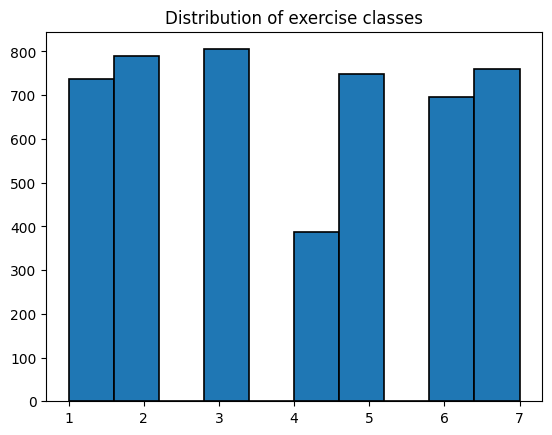

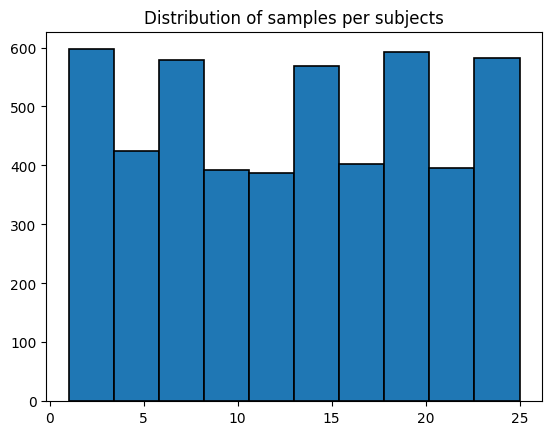


1. Total number of features: 1432


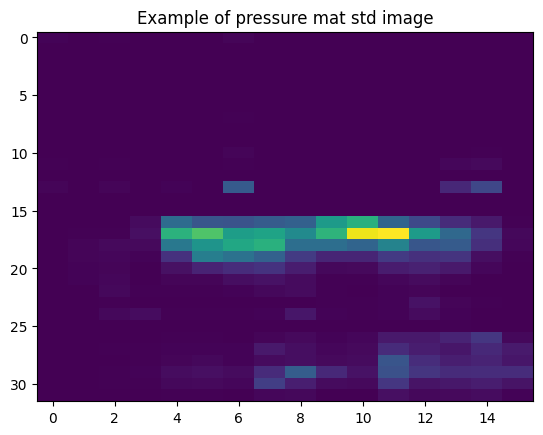

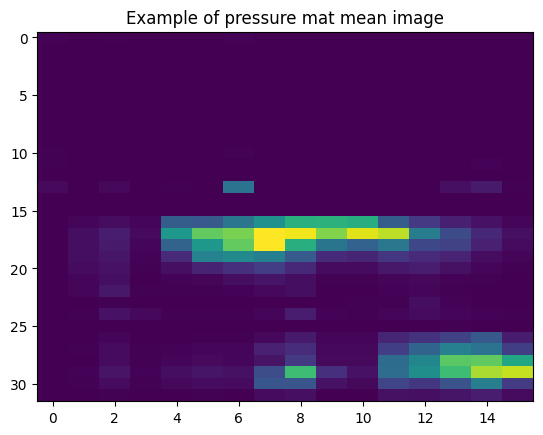

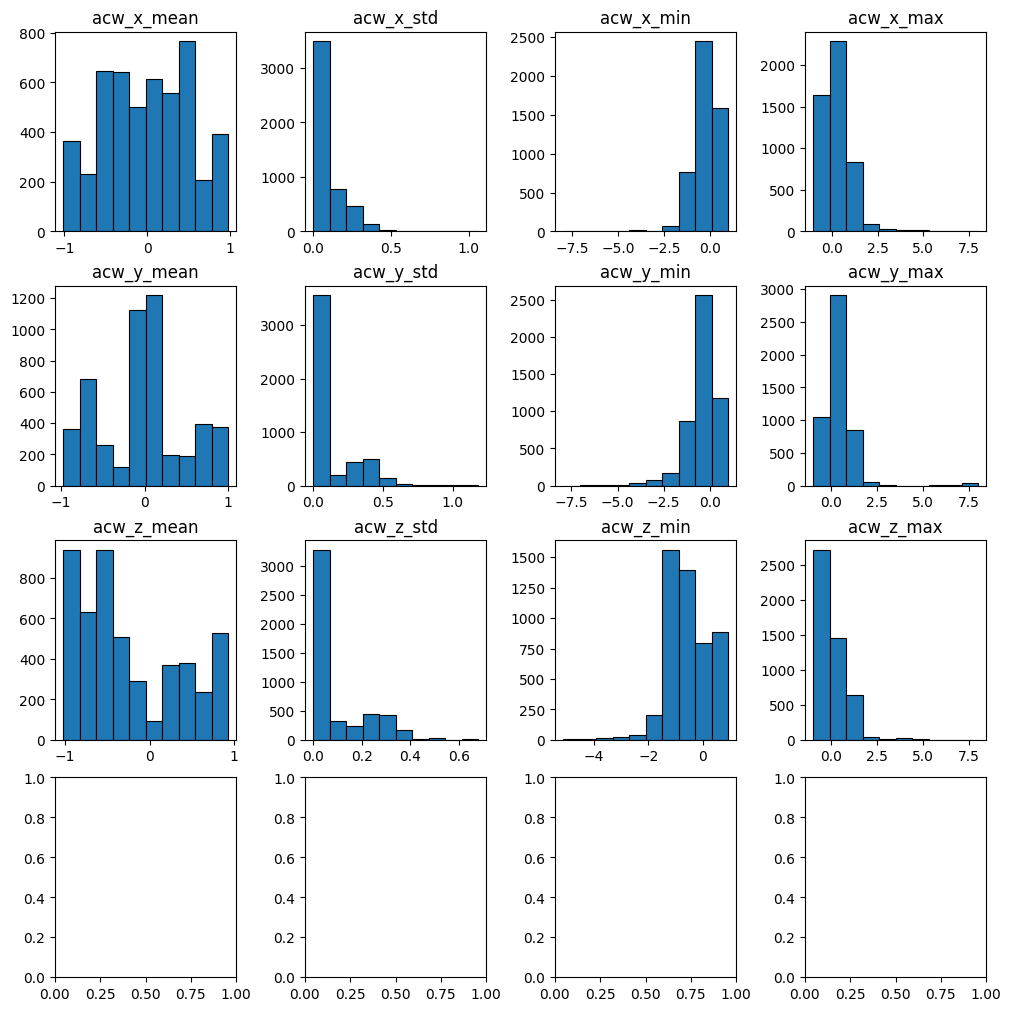

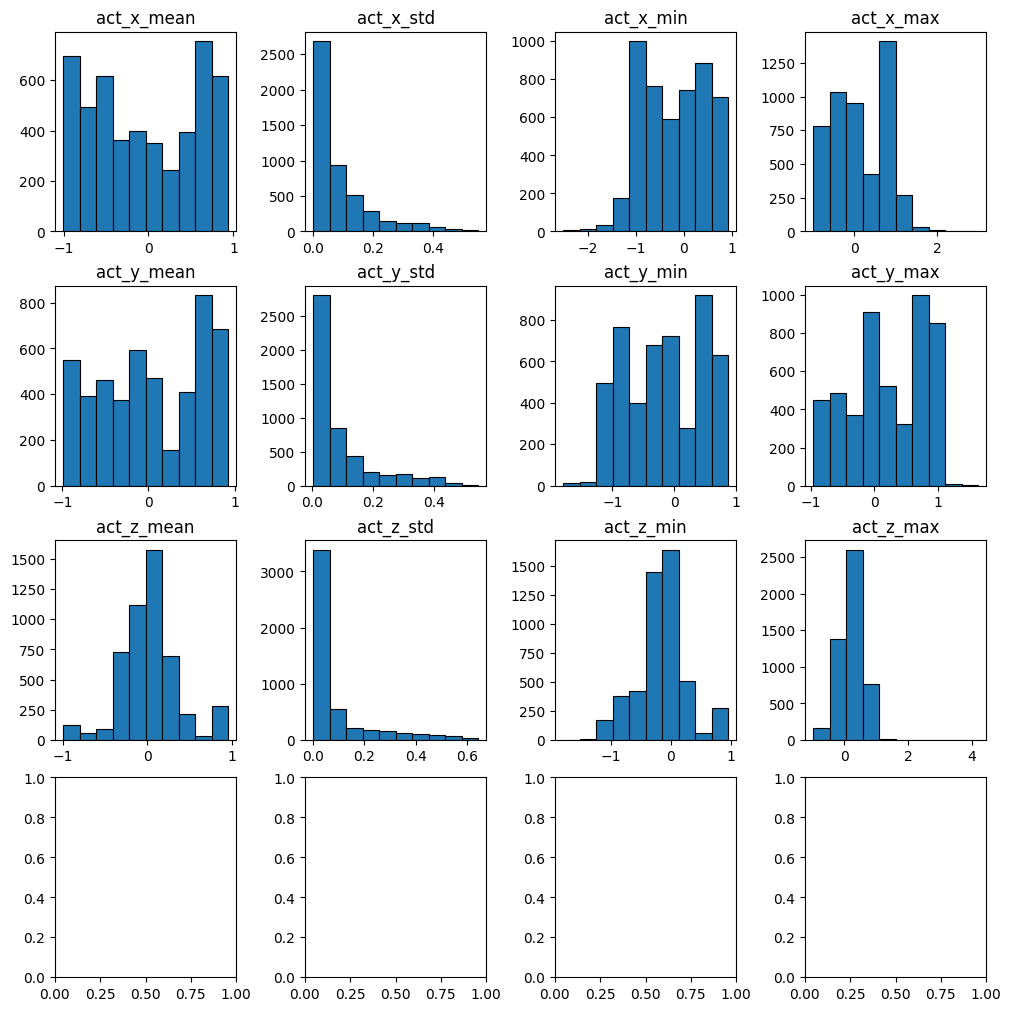

In [ ]:

# Do more exploration and visualization of the data here

# View headers 
print(list(train_df))

# Analyze subject IDs and exercise (ground truth) values
y_train = train_df.exercise.values
sub_ids = train_df.subject_id.values

print("\nExamples of subject IDs : ", sub_ids[np.random.randint(0, len(sub_ids), 5)])

# Histograms
# TODO: make more cleaner looking histograms
fig = plt.Figure(figsize=(10, 5))

fig.add_subplot(2, 1, 1)
plt.hist(y_train, edgecolor='black', linewidth=1.2)
plt.title("Distribution of exercise classes")
plt.show()

fig.add_subplot(2, 1, 2)
plt.hist(sub_ids, edgecolor='black', linewidth=1.2)
plt.title("Distribution of samples per subjects")
plt.show()


total_number_of_features = len(acc_act_cols) + len(acc_acw_cols) + len(pressure_cols) + len(depth_cols)
print(f"\n1. Total number of features: {total_number_of_features}")

columns_to_drop = ['subject_id', 'exercise']
train_df_feats = train_df.drop(columns=columns_to_drop, axis=1)

pressure_std_cols = [col for col in pressure_cols if '_std' in col]
pressure_mu_cols = [col for col in pressure_cols if '_mean' in col]


# Plot the first image from depth camera std
pressure_mat_first = train_df[pressure_std_cols].iloc[0].values
pressure_std_image = pressure_mat_first.reshape(32, 16)
plt.imshow(pressure_std_image, cmap='viridis', aspect='auto')
plt.title("Example of pressure mat std image")
plt.show()

# Plot the first image from depth camera mu
pressure_mat_first = train_df[pressure_mu_cols].iloc[0].values
pressure_std_image = pressure_mat_first.reshape(32, 16)
plt.imshow(pressure_std_image, cmap='viridis', aspect='auto')
plt.title("Example of pressure mat mean image")
plt.show()


# Visualize acw features
fig, axes = plt.subplots(
    4,
    3,
    figsize=(10, 10),   # wide figure
    constrained_layout=True
)

axes = axes.ravel()

for i, col in enumerate(acc_acw_cols):
    ax = axes[i]
    vals = train_df[col].values

    ax.hist(vals, edgecolor="black", linewidth=0.8)
    ax.set_title(col, fontsize=12)
    ax.tick_params(labelsize=10)

# ACT
fig, axes = plt.subplots(
4,
3,
figsize=(10, 10),   # wide figure
constrained_layout=True
)

axes = axes.ravel()

for i, col in enumerate(acc_act_cols):
    ax = axes[i]
    vals = train_df[col].values

    ax.hist(vals, edgecolor="black", linewidth=0.8)
    ax.set_title(col, fontsize=12)
    ax.tick_params(labelsize=10)



# 2. Data preprocessing and feature extraction

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Task 2.</b> (3 Points)

**Your task:** Prepare the data for modeling. Consider what preprocessing steps and feature engineering might improve classification performance. Common approaches include normalization, dimensionality reduction (PCA, LDA), feature selection, or creating new features. Document your choices and rationale in the report.

*Hint: The objects/transformers you create here can be used in Task 3.*
    
</div>

In [142]:
from scipy.ndimage import label
import numpy as np

def compute_pressure_mat_features(df, H=32, W=16):
    """
    Compute PM features for each row (sample) in df.
    
    df: DataFrame with columns pressure_mat_pixel_{i}_mean (i=0..H*W-1)
    H, W: height and width of pressure mat
    threshold_ratio: fraction of max pressure to consider "high pressure"
    
    Returns: DataFrame with features
    """
    n_samples = df.shape[0]
    n_pixels = H * W
    
    features = {
        "pressure_mat_CoP_x": [],
        "pressure_mat_CoP_y": [],
        "pressure_mat_variance": [],
    }
    
    for idx in range(n_samples):
        # Build pressure mat for this sample
        pm = np.array([df.loc[idx, f"pressure_mat_pixel_{i}_mean"] for i in range(n_pixels)])
        pm = pm.reshape(H, W)
        
        # Center of pressure (weighted average)
        total_p = pm.sum() + 1e-8  # avoid division by zero
        yy, xx = np.meshgrid(np.arange(H), np.arange(W), indexing="ij")
        cop_x = (pm * xx).sum() / total_p
        cop_y = (pm * yy).sum() / total_p
        
        # Pressure variance
        var_pm = pm.var()
        
        # Append features
        features["pressure_mat_CoP_x"].append(cop_x)
        features["pressure_mat_CoP_y"].append(cop_y)
        features["pressure_mat_variance"].append(var_pm)
    
    return pd.DataFrame(features)

# Usage example:
pm_features_df = compute_pressure_mat_features(train_df_feats)

train_df_combined = pd.concat([train_df_feats, pm_features_df], axis=1)
print(train_df_combined.head())




   act_x_mean  act_x_std  act_x_min  act_x_max  act_y_mean  act_y_std  \
0   -0.652865   0.132935  -0.859375  -0.468750   -0.539319   0.022066   
1   -0.661984   0.310596  -1.156250  -0.140625   -0.508161   0.426187   
2   -1.000182   0.008614  -1.031250  -0.968750   -0.127766   0.037614   
3   -0.235012   0.020838  -0.281250  -0.203125   -0.913380   0.017185   
4    0.935429   0.007142   0.890625   0.968750   -0.080227   0.019331   

   act_y_min  act_y_max  act_z_mean  act_z_std  ...  depth_pixel_188_std  \
0  -0.640625  -0.484375    0.351124   0.324170  ...         0.000000e+00   
1  -1.046875   0.093750    0.106038   0.130194  ...         2.220446e-16   
2  -0.234375  -0.031250    0.025383   0.025964  ...         9.017974e-04   
3  -0.968750  -0.875000    0.274120   0.054047  ...         3.325842e-04   
4  -0.140625   0.000000   -0.032225   0.013914  ...         3.330669e-16   

   depth_pixel_189_mean  depth_pixel_189_std  depth_pixel_190_mean  \
0              0.960400         0.

In [139]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
import time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SequentialFeatureSelector as SFS
import sys
from sklearn.base import clone
from scipy.stats import mode
from collections import Counter
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from scipy.fftpack import dct
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



class DCTTransformer(BaseEstimator, TransformerMixin):
    # Created by CHAT-GPT 5
    def __init__(self, n_components=None, norm="ortho", use_abs=True):
        """
        n_components : int or None
            Number of DCT coefficients to keep.
            If None, keep all.
        """
        self.n_components = n_components
        self.norm = norm
        self.use_abs = use_abs

    def fit(self, X, y=None):
        # No fitting needed for DCT
        return self

    def transform(self, X):
        """
        X shape: (n_samples, n_features)
        DCT is applied row-wise (per sample)
        """

        X_dct = dct(X, type=2, axis=1, norm='ortho')
        if self.use_abs:
            X_dct = np.abs(X_dct)

        # Select coefficients
        X_dct = X_dct[:, :self.n_components]


        return X_dct
    
def make_pipelines_dct(n_dc_comps):
    return  {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("dct", DCTTransformer(n_components=n_dc_comps)),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=1.0,
                class_weight="balanced"
            ))
        ]),
        "gnb": Pipeline([
            ("scaler", StandardScaler()),
            ("dct", DCTTransformer(n_components=n_dc_comps)),
            ("clf", GaussianNB())
        ]),
        "svm-linear": Pipeline([
            ("scaler", StandardScaler()),
            ("dct", DCTTransformer(n_components=n_dc_comps)),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ]),
        "svm-rbf": Pipeline([
            ("scaler", StandardScaler()),
            ("dct", DCTTransformer(n_components=n_dc_comps)),
            ("clf", SVC(
                kernel="rbf",
                class_weight="balanced"
            ))
        ]),
        "svm-poly": Pipeline([
            ("scaler", StandardScaler()),
            ("dct", DCTTransformer(n_components=n_dc_comps)),
            ("clf", SVC(
                kernel="poly",
                degree = 3,
                C=1.0,
                class_weight="balanced"
            ))
        ]) }


def make_pipelines_kernel_pca(n_comps):
    return  {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("kpca", KernelPCA(n_components=n_comps, kernel="rbf")),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=1.0,
                class_weight="balanced"            ))
        ]),
        "gnb": Pipeline([
            ("scaler", StandardScaler()),
            ("kpca", KernelPCA(n_components=n_comps, kernel="rbf")),
            ("clf", GaussianNB())
        ]),
        "svm-linear": Pipeline([
            ("scaler", StandardScaler()),
            ("kpca", KernelPCA(n_components=n_comps, kernel="rbf")),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"            ))
        ]),
        "svm-rbf": Pipeline([
            ("scaler", StandardScaler()),
            ("kpca", KernelPCA(n_components=n_comps, kernel="rbf")),
            ("clf", SVC(
                kernel="rbf",
                class_weight="balanced"            ))
        ]),
        "svm-poly": Pipeline([
            ("scaler", StandardScaler()),
            ("kpca", KernelPCA(n_components=n_comps, kernel="rbf")),
            ("clf", SVC(
                kernel="poly",
                degree = 3,
                C=1.0,
                class_weight="balanced"            ))
        ]) }

def make_pipelines_lda():
    return  {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("lda", LinearDiscriminantAnalysis(n_components=None)),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=1.0,
                class_weight="balanced"
            ))
        ]),
        "gnb": Pipeline([
            ("scaler", StandardScaler()),
            ("lda", LinearDiscriminantAnalysis(n_components=None)),
            ("clf", GaussianNB())
        ]),
        "svm-linear": Pipeline([
            ("scaler", StandardScaler()),
            ("lda", LinearDiscriminantAnalysis(n_components=None)),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ]),
        "svm-rbf": Pipeline([
            ("scaler", StandardScaler()),
            ("lda", LinearDiscriminantAnalysis(n_components=None)),
            ("clf", SVC(
                kernel="rbf",
                class_weight="balanced"
            ))
        ]),
        "svm-poly": Pipeline([
            ("scaler", StandardScaler()),
            ("lda", LinearDiscriminantAnalysis(n_components=None)),
            ("clf", SVC(
                kernel="poly",
                degree = 3,
                C=1.0,
                class_weight="balanced"
            ))
        ]) }

    
def make_pipelines_pca(n_comps):
    return  {
        "logreg": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_comps)),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=1.0,
                class_weight="balanced"
            ))
        ]),
        "gnb": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_comps)),
            ("clf", GaussianNB())
        ]),
        "svm-linear": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_comps)),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ]),
        "svm-rbf": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_comps)),
            ("clf", SVC(
                kernel="rbf",
                class_weight="balanced"
            ))
        ]),
        "svm-poly": Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_comps)),
            ("clf", SVC(
                kernel="poly",
                degree = 3,
                C=1.0,
                class_weight="balanced"
            ))
        ]) }

def make_base_classification_pipelines(scaler):
    return  {
        "logreg": Pipeline([
            ("scaler", scaler),
            ("clf", LogisticRegression(
                max_iter=1000,
                C=1.0,
                class_weight="balanced"
            ))
        ]),
        "gnb": Pipeline([
            ("scaler", scaler),
            ("clf", GaussianNB())
        ]),
        "svm-linear": Pipeline([
            ("scaler", scaler),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced"
            ))
        ]),
        "svm-rbf": Pipeline([
            ("scaler", scaler),
            ("clf", SVC(
                kernel="rbf",
                class_weight="balanced"
            ))
        ]),
        "svm-poly": Pipeline([
            ("scaler", scaler),
            ("clf", SVC(
                kernel="poly",
                degree = 3,
                C=1.0,
                class_weight="balanced"
            ))
        ]) }



def early_fusion_approach(X_train, y_train, X_test, y_test, approach, scaler):


    if approach == "early-raw":
        pipelines = make_base_classification_pipelines(scaler)
    elif approach == "early-pca":
        pipelines = make_pipelines_pca(0.90)
    elif approach == "early-dct":
        n_feats = X_train.shape[1]
        print("Using ", round(n_feats*0.2), " feats")
        pipelines = make_pipelines_dct(round(n_feats*0.2))
    elif approach == "early-kpca":
        n_feats = X_train.shape[1]
        kpcs = round(n_feats*0.2)
        pipelines = make_pipelines_kernel_pca(kpcs)
    elif approach == "early-lda":
        pipelines = make_pipelines_lda()


    scores = {
    "logreg": 0.0,
    "gnb": 0.0,
    "svm-linear": 0.0,
    "svm-poly": 0.0,
    "svm-rbf": 0.0
    }

    weights = compute_sample_weight("balanced", y_train)
    for name, pipe in pipelines.items():

        if name == "gnb":
            pipe.fit(X_train, y_train, clf__sample_weight=weights)
        else:
            pipe.fit(X_train, y_train)

        y_hat = pipe.predict(X_test)
        scores[name] = f1_score(y_test, y_hat, average="macro")

    return scores["logreg"], scores["gnb"], scores["svm-linear"], scores["svm-poly"], scores["svm-rbf"]

def borda_count(preds):
    # Borda count for class labels
    y_final = []
    for i in range(preds.shape[1]):
        votes = preds[:, i]
        counts = Counter(votes)
        y_final.append(counts.most_common(1)[0][0])
    return np.array(y_final)

def split_data_based_on_modality(X_train, X_test, feat_names):
    # INPUTS
    # X_data : features
    # y_data : labels
    # feat_names : list

    # OUTPUTS
    # dictionary output of train-test data per modality

    X_train = pd.DataFrame(X_train, columns=feat_names)
    X_test  = pd.DataFrame(X_test, columns=feat_names)

    
    # Identify columns by modality
    act_cols = [c for c in feat_names if c.startswith("act_")]
    acw_cols = [c for c in feat_names if c.startswith("acw_")]
    pressure_cols = [c for c in feat_names if c.startswith("pressure_mat_")]
    depth_cols = [c for c in feat_names if c.startswith("depth_")]

    # Split features
    X_train_act = X_train[act_cols].values
    X_test_act = X_test[act_cols].values

    X_train_acw = X_train[acw_cols].values
    X_test_acw = X_test[acw_cols].values

    X_train_pressure = X_train[pressure_cols].values
    X_test_pressure = X_test[pressure_cols].values

    X_train_depth = X_train[depth_cols].values
    X_test_depth = X_test[depth_cols].values

    # Labels are the same for all modalities
    return {
        "act_train": X_train_act,
        "act_test": X_test_act,
        "acw_train": X_train_acw,
        "acw_test": X_test_acw,
        "pressure_train": X_train_pressure,
        "pressure_test": X_test_pressure,
        "depth_train": X_train_depth,
        "depth_test": X_test_depth
    }


# 3. Feature selection, fusion and model development and evaluation

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Task 3.</b> (10 Points)

**Your task:** Develop and evaluate a user-independent exercise classifier

Experiment with:
- At least **two different fusion strategies** (e.g., early fusion (feature level), late fusion (decision level), intermediate level (eg. kernel level fusion), hybrid of any combination

You could also experiment with:
- Different classifiers and architectures
- Various feature combinations

In your report, document what you tried, explain your design choices, and present your best approach with confusion matrix and F1-score.

**Important:** The approach you finalize here will be used for the held-out test set prediction in Task 4.

*Hint: Consider using Leave-One-Subject-Out (LOSO) cross-validation. You might want to try some new things on task 2 based on the results here*
</div>

In [ ]:
# Fusion strategies to test
#
# Approach 1 - utilize all features from all modalities with LOSO-CV - standardize data
#
# Approach 1 Avg. F1 macro scores
# Logistic regression F1 score : 0.8694898412557795
# Naive Bayes F1 score : 0.5214310306023093
# AdaBoost F1 score : 0.33339218807885046
# SVC F1 score : 0.8772841420545663
# 
# NOTES
# Adaboost only used 10 ensembles to speed up and thus likely under performed
# Best model: SVC () kernel="linear", class_weight="balanced")
# In next approach dimensionalities are reduced

# Approach 2 - PCA dimensionality reduction with early fusion (PCs : 90% variance explained)
# Avg. F1 macro scores
# Approach 2 Avg. F1 macro scores

#
# NOTES: 
# Best model is Logistic regression but it's weaker than in last round



#
# NOTES from Miika:
# 1 Project is sufficient in terms of classifiers.. Just put more fusion methods.. at least one more.. late fusion..
# 2 Document in project report where the pre-process methods are (in pipelines)
# 3 Windowing of data : 5 seconds with 2 sec overlap (more or less)
#

# Classifiers 
# Logistic Regression
# Naive Bayes
# SVM learners


# Feature selection methods to test
# PCA (select some of the components)
# SFS

# VALIDATION
# LOSOCV for each approach defines 

In [ ]:
# Single sensor classification

from joblib import Parallel, delayed
import numpy as np
import time

def run_loso_fold(fold_num, X_train_loso, X_test_loso, y_train_loso, y_test_loso, approach, scaler):
    t_start = time.time()

    # Run early fusion approach
    f1_logreg, f1_gnb, f1_svm_linear, f1_svm_poly, f1_svm_rbf = early_fusion_approach(
        X_train_loso, y_train_loso, X_test_loso, y_test_loso, approach, scaler
    )

    print(f"LOSO-CV run {fold_num}")
    print("Time taken : ", time.time() - t_start)

    return f1_logreg, f1_gnb, f1_svm_linear, f1_svm_poly, f1_svm_rbf


# Get all fold indices
logo = LeaveOneGroupOut()

feat_names = train_df_feats.columns.tolist()
X_train = train_df_feats.values
#X_train = train_df_combined.values
#feat_names = train_df_combined.columns.tolist()
#X_train = X_train[:, :-5:-1]
#feat_names = feat_names[:-5:-1]

print(f"Training data shape {X_train.shape}")

# early-raw, early-pca, early-dct early-kpca
modality = ["pressure"] #["act", "acw"] # act acw depth pressure
approach = "early-raw" # raw pca kpca lda

fold_indices = list(logo.split(X_train, y_train, sub_ids))
n_folds = len(fold_indices)

results = []
for i, (train_idx, test_idx) in enumerate(fold_indices):

    X_modality = split_data_based_on_modality(X_train[train_idx, :], X_train[test_idx, :], feat_names)

    X_valid_train_list = []
    X_valid_test_list = []

    for m in modality:   # modality = ["act", "acw", ...]
        X_valid_train_list.append(X_modality[f"{m}_train"])
        X_valid_test_list.append(X_modality[f"{m}_test"])

    # Concatenate features (NOT stack)
    X_valid_train = np.concatenate(X_valid_train_list, axis=1)
    X_valid_test = np.concatenate(X_valid_test_list, axis=1)

    y_valid_train = y_train[train_idx]
    y_valid_test = y_train[test_idx]

    if "acw" in modality:
        print("robust scaling used")
        scaler = RobustScaler()
    else:
        scaler = StandardScaler()

    result = run_loso_fold(i+1, X_valid_train, X_valid_test, y_valid_train, y_valid_test, approach, scaler)
    results.append(result)

logreg_f1scs = np.array([r[0] for r in results])
gnb_f1scs = np.array([r[1] for r in results])
svm_linear_f1scs = np.array([r[2] for r in results])
svm_poly_f1scs = np.array([r[3] for r in results])
svm_rbf_f1scs = np.array([r[4] for r in results])

# Print average scores
print(f"\Modality : {modality} with {approach} approach Avg. F1 macro scores")
print(f"Logistic regression F1 score : {np.mean(logreg_f1scs):.3f}")
print(f"Naive Bayes F1 score : {np.mean(gnb_f1scs):.3f}")
print(f"SVM linear F1 score : {np.mean(svm_linear_f1scs):.3f}")
print(f"SVM poly F1 score : {np.mean(svm_poly_f1scs):.3f}")
print(f"SVM RBF F1 score : {np.mean(svm_rbf_f1scs):.3f}")


<>:79: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
<>:79: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
C:\Users\milvesma19\AppData\Local\Temp\ipykernel_22632\4287848791.py:79: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
  print(f"\Modality : {modality} with {approach} approach Avg. F1 macro scores")


['depth_pixel_191_std', 'pressure_mat_CoP_x', 'pressure_mat_CoP_y', 'pressure_mat_variance']
Training data shape (4923, 4)
LOSO-CV run 1
Time taken :  1.0665028095245361
LOSO-CV run 2
Time taken :  1.046983003616333
LOSO-CV run 3
Time taken :  1.09269118309021
LOSO-CV run 4
Time taken :  1.1469802856445312
LOSO-CV run 5
Time taken :  1.1898589134216309
LOSO-CV run 6
Time taken :  1.4013869762420654
LOSO-CV run 7
Time taken :  1.5540688037872314
LOSO-CV run 8
Time taken :  1.434757947921753
LOSO-CV run 9
Time taken :  1.5003628730773926
LOSO-CV run 10
Time taken :  1.5729570388793945
LOSO-CV run 11
Time taken :  1.490257740020752
LOSO-CV run 12
Time taken :  1.3839812278747559
LOSO-CV run 13
Time taken :  1.3949193954467773
LOSO-CV run 14
Time taken :  1.4704406261444092
LOSO-CV run 15
Time taken :  1.41306734085083
LOSO-CV run 16
Time taken :  1.3584556579589844
LOSO-CV run 17
Time taken :  1.3743088245391846
LOSO-CV run 18
Time taken :  1.3643057346343994
LOSO-CV run 19
Time taken :  

In [148]:
# Early fusion approaches
#
# 
#

feat_names = train_df_feats.columns.tolist()

logo = LeaveOneGroupOut()

X_train = train_df_feats.values
print(f"Training data shape {X_train.shape}")

# LOSO-CV validation

n_folds = len(np.unique(sub_ids))

# early-raw, early-pca, early-dct early-kpca
approach = "early-raw" # early-raw early-pca early-kpca 

print(f"Approach {approach}")
logreg_f1scs = np.zeros((n_folds, 1))
gnb_f1scs = np.zeros((n_folds, 1))
svm_linear_f1scs = np.zeros((n_folds, 1))
svm_poly_f1scs = np.zeros((n_folds, 1))
svm_rbf_f1scs = np.zeros((n_folds, 1))

for i, (train_index, test_index) in enumerate(logo.split(X_train, y_train, sub_ids)):
    t_start = time.time()
    X_valid = X_train[train_index, :]
    y_valid = y_train[train_index]
    X_valid_test = X_train[test_index, :]
    y_valid_test = y_train[test_index]

    scaler = StandardScaler()

    # Early fusion
    f1_logreg, f1_gnb, f1_svm_linear, f1_svm_poly, f1_svm_rbf = early_fusion_approach(X_valid, y_valid,
                                                                   X_valid_test, 
                                                                   y_valid_test, approach, scaler)


    logreg_f1scs[i] = f1_logreg
    gnb_f1scs[i] = f1_gnb
    svm_linear_f1scs[i] = f1_svm_linear
    svm_poly_f1scs[i] = f1_svm_poly
    svm_rbf_f1scs[i] = f1_svm_rbf

    if i % 5 == 0:
        print(f"Fold {i+1} \\ {n_folds} running average F1 scores")
        print(f"Logistic regression F1 score : {np.mean(logreg_f1scs[:i+1])}")
        print(f"Naive Bayes F1 score : {np.mean(gnb_f1scs[:i+1])}")
        print(f"SVM linear F1 score : {np.mean(svm_linear_f1scs[:i+1])}")
        print(f"SVM poly F1 score : {np.mean(svm_poly_f1scs[:i+1])}")
        print(f"SVM rbf F1 score : {np.mean(svm_rbf_f1scs[:i+1])}")
        print(f"Time taken : {round(time.time() - t_start)} seconds")
    
print(f"\nApproach {approach} Avg. F1 macro scores")
print(f"Logistic regression F1 score : {round(np.mean(logreg_f1scs), 3)}")
print(f"Naive Bayes F1 score : {round(np.mean(gnb_f1scs),3)}")
print(f"SVM linear F1 score : {round(np.mean(svm_linear_f1scs), 3)}")
print(f"SVM poly score : {round(np.mean(svm_poly_f1scs),3)}")
print(f"SVM rbf score : {round(np.mean(svm_rbf_f1scs), 3)}")


Training data shape (4923, 1432)
Approach early-raw


KeyboardInterrupt: 

In [ ]:
# Late Fusion

from joblib import Parallel, delayed
import numpy as np
import time
from scipy.stats import rankdata
from scipy.stats.mstats import gmean

def make_act_acw_pipeline(scaler):
    return  Pipeline([
            ("scaler", scaler),
            ("clf", SVC(
                kernel="rbf",
                class_weight="balanced",
                probability=True
            ))])

def make_dc_pipeline(scaler):
    return  Pipeline([
            ("scaler", scaler),
            ("clf", SVC(
                kernel="linear",
                class_weight="balanced",
                probability=True
            ))])

def create_semantic_features(probs_dict):
    meta_features_list = []
    for name, probs in probs_dict.items():
        # probs.shape = (n_samples, n_classes)

        # 1. Raw probabilities
        meta_features_list.append(probs)

    return np.hstack(meta_features_list)

def late_fusion_approach(X_train, y_train, X_test, y_test, approach):

    if approach == "late-act-acw-depth":
        # ACT + ACW -->
        act_acw_pipe = make_act_acw_pipeline(RobustScaler())
        cols_acw_act = [c for c in X_train.columns if "act" in c or "acw" in c]
        act_acw_pipe.fit(X_train[cols_acw_act].values, y_train)
        yhat_act_acw = act_acw_pipe.predict(X_train[cols_acw_act].values)
        f1_1 = f1_score(y_train, yhat_act_acw, average="macro")

        # DP
        depth_pipe = make_dc_pipeline(StandardScaler())
        cols_depth = [c for c in X_train.columns if "depth" in c]

        depth_pipe.fit(X_train[cols_depth].values, y_train)
        yhat_depth = depth_pipe.predict(X_train[cols_depth].values)
        f1_2 = f1_score(y_train, yhat_depth, average="macro")

        w1 = f1_1 / (f1_1 + f1_2)
        w2 = f1_2 / (f1_1 + f1_2)

        print(f"Weights {w1} and {w2}")

        # Predict probabilities
        probs1= act_acw_pipe.predict_proba(X_test[cols_acw_act].values)
        probs2 = depth_pipe.predict_proba(X_test[cols_depth].values)

        semantic_feats = create_semantic_features({"act_acw_probs": probs1, 
                                                   "depth_probs": probs2})
        
    elif approach == "late-act+acw-depth+pressure":
        # ACT + ACW -->
        act_acw_pipe = make_act_acw_pipeline(RobustScaler())
        cols_acw_act = [c for c in X_train.columns if "act" in c or "acw" in c]
        act_acw_pipe.fit(X_train[cols_acw_act].values, y_train)
        yhat_act_acw = act_acw_pipe.predict(X_train[cols_acw_act].values)
        f1_1 = f1_score(y_train, yhat_act_acw, average="macro")

        # Depth + Pressure
        depth_pressure_pipe = make_dc_pipeline(StandardScaler())
        cols_depth_pressure = [c for c in X_train.columns if "depth" in c or "pressure" in c]

        depth_pressure_pipe.fit(X_train[cols_depth_pressure].values, y_train)
        yhat_dp_pr = depth_pressure_pipe.predict(X_train[cols_depth_pressure].values)
        f1_2 = f1_score(y_train, yhat_dp_pr, average="macro")

        w1 = f1_1 / (f1_1 + f1_2)
        w2 = f1_2 / (f1_1 + f1_2)

        print(f"Weights {w1} and {w2}")

        # Predict probabilities
        probs1= act_acw_pipe.predict_proba(X_test[cols_acw_act].values)
        probs2 = depth_pressure_pipe.predict_proba(X_test[cols_depth_pressure].values)

        semantic_feats = create_semantic_features({"act_acw_probs": probs1, 
                                                   "depth_pressure_probs": probs2})


    # Conduct fusion combination strategies

    # Weighted mean
    probs_fused_mean = w1 * probs1 + w2 * probs2
    y_hat = np.argmax(probs_fused_mean, axis=1) + 1
    f1_mu = f1_score(y_test, y_hat, average="macro")

    # Borda count
    ranks1 = np.apply_along_axis(rankdata, 1, -probs1)
    ranks2 = np.apply_along_axis(rankdata, 1, -probs2)
    borda_scores = w1 * ranks1 + w2 * ranks2
    y_hat = np.argmin(borda_scores, axis=1) + 1
    f1_borda = f1_score(y_test, y_hat, average="macro")

    # Weighted majority vote
    pred1 = np.argmax(probs1, axis=1)
    pred2 = np.argmax(probs2, axis=1)
    w_sum = w1 + w2
    w1_mv = w1 / w_sum
    w2_mv = w2 / w_sum
    n_classes = probs1.shape[1]
    vote_scores = np.zeros((len(pred1), n_classes))
    vote_scores[np.arange(len(pred1)), pred1] += w1_mv
    vote_scores[np.arange(len(pred2)), pred2] += w2_mv
    y_hat = np.argmax(vote_scores, axis=1) + 1
    f1_mv = f1_score(y_test, y_hat, average="macro")

    # Median
    probs_median = np.median(np.stack([probs1, probs2]), axis=0)
    y_hat = np.argmax(probs_median, axis=1) + 1
    f1_median = f1_score(y_test, y_hat, average="macro")

    # Min
    probs_min = np.minimum(probs1, probs2)
    y_hat = np.argmax(probs_min, axis=1) + 1
    f1_min = f1_score(y_test, y_hat, average="macro")

    # Max
    probs_max = np.maximum(probs1, probs2)
    y_hat = np.argmax(probs_max, axis=1) + 1
    f1_max = f1_score(y_test, y_hat, average="macro")

    # Geometric mean
    probs_gmean = np.exp(w1 * np.log(probs1 + 1e-9) + w2 * np.log(probs2 + 1e-9))
    y_hat = np.argmax(probs_gmean, axis=1) + 1
    f1_gmean = f1_score(y_test, y_hat, average="macro")

    # Semantic learning
    scores = {
    "logreg": 0.0,
    "gnb": 0.0,
    "svm-linear": 0.0,
    "svm-poly": 0.0,
    "svm-rbf": 0.0
    }

    semantic_pipelines = make_base_classification_pipelines(None)

    weights = compute_sample_weight("balanced", y_train)
    for name, pipe in semantic_pipelines.items():

        if name == "gnb":
            pipe.fit(X_train, y_train, clf__sample_weight=weights)
        else:
            pipe.fit(X_train, y_train)

        y_hat = pipe.predict(X_test)
        scores[name] = f1_score(y_test, y_hat, average="macro")

    return {
        "mean": f1_mu,
        "borda": f1_borda,
        "majority_vote": f1_mv,
        "median": f1_median,
        "min": f1_min,
        "max": f1_max,
        "geometric_mean": f1_gmean,
        "semantic-logreg": scores["logreg"],
        "semantic-gnb": scores["gnb"],
        "semantic-svm-linear": scores["svm-linear"],
        "semantic-svm-poly": scores["svm-poly"],
        "semantic-svm-rbf": scores["svm-rbf"]
        }


def run_loso_late_fold(fold_num, X_train_loso, X_test_loso, y_train_loso, y_test_loso, approach):
    t_start = time.time()

    # Run early fusion approach
    f1_vals = late_fusion_approach(
        X_train_loso, y_train_loso, X_test_loso, y_test_loso, approach
    )

    print(f"LOSO-CV run {fold_num}")
    print("Time taken : ", time.time() - t_start)

    return f1_vals

# Get all fold indices
logo = LeaveOneGroupOut()

feat_names = train_df_feats.columns.tolist()

# late-act+acw-depth+pressure
# late-act-acw-depth
approach = "late-act-acw-depth"

if approach == "late-act-acw-depth":
    # ACT+ACW and DP
    cols = [c for c in train_df_feats.columns if "act" in c or "acw" in c or "depth" in c]
    feat_names = train_df_feats[cols].columns.tolist()
    X_train = train_df_feats[cols].values
elif approach == "late-act+acw-depth+pressure":
    X_train = train_df_feats.values

print(f"Training data shape {X_train.shape}")

fold_indices = list(logo.split(X_train, y_train, sub_ids))
n_folds = len(fold_indices)

fusion_keys = [
    "mean",
    "borda",
    "majority_vote",
    "median",
    "min",
    "max",
    "geometric_mean",
    "semantic-logreg",
    "semantic-gnb",
    "semantic-svm-linear",
    "semantic-svm-poly",
    "semantic-svm-rbf"
]

results = {k: [] for k in fusion_keys}

for i, (train_idx, test_idx) in enumerate(fold_indices):

    # Concatenate features (NOT stack)
    X_valid_train = pd.DataFrame(X_train[train_idx, :], columns=feat_names)
    X_valid_test = pd.DataFrame(X_train[test_idx, :], columns=feat_names)

    y_valid_train = y_train[train_idx]
    y_valid_test = y_train[test_idx]

    if "acw" in modality:
        print("robust scaling used")
        scaler = RobustScaler()
    else:
        scaler = StandardScaler()

    fold_results = run_loso_late_fold(i+1, X_valid_train, X_valid_test, y_valid_train, y_valid_test, approach)

    for k in fusion_keys:
        results[k].append(fold_results[k])

# Print average scores
print(f"\nLate Fusion {approach} LOSO-CV results:")

for k in fusion_keys:
    mean_f1 = np.mean(results[k])
    std_f1 = np.std(results[k])
    print(f"{k:15s} : {mean_f1:.3f} ± {std_f1:.3f}")

Training data shape (4923, 1432)
Weights 0.4942010561986423 and 0.5057989438013577
LOSO-CV run 1
Time taken :  41.26669001579285
Weights 0.4943961099955012 and 0.5056038900044988
LOSO-CV run 2
Time taken :  42.80035924911499
Weights 0.49453180459830115 and 0.5054681954016988
LOSO-CV run 3
Time taken :  43.1978657245636
Weights 0.49427671622538966 and 0.5057232837746103
LOSO-CV run 4
Time taken :  40.85594940185547
Weights 0.49399181690992067 and 0.5060081830900793
LOSO-CV run 5
Time taken :  40.50024938583374
Weights 0.4944870609642183 and 0.5055129390357818
LOSO-CV run 6
Time taken :  43.689990282058716
Weights 0.4943107964461752 and 0.5056892035538249
LOSO-CV run 7
Time taken :  47.800631523132324
Weights 0.4942257992824917 and 0.5057742007175082
LOSO-CV run 8
Time taken :  46.17314100265503
Weights 0.4939987464244861 and 0.506001253575514
LOSO-CV run 9
Time taken :  49.59718203544617
Weights 0.49410036681173036 and 0.5058996331882697
LOSO-CV run 10
Time taken :  40.93596792221069
We

In [ ]:
#Late Fusion late-act+acw-depth+pressure LOSO-CV results:
#mean            : 0.949 ± 0.059
#borda           : 0.915 ± 0.082
#majority_vote   : 0.868 ± 0.136
#median          : 0.949 ± 0.053
#min             : 0.959 ± 0.056
#max             : 0.943 ± 0.057
#geometric_mean  : 0.964 ± 0.051 BEST
#semantic-logreg : 0.577 ± 0.171
#semantic-gnb    : 0.521 ± 0.204
#semantic-svm-linear : 0.597 ± 0.171
#semantic-svm-poly : 0.457 ± 0.227
#semantic-svm-rbf : 0.634 ± 0.169 

In [ ]:
# https://arxiv.org/pdf/1908.08992

#📌 What your current results are actually telling you
#Modality	Interpretation
#ACT	✔ Working, strong baseline
#Depth	⚠ Partially useful, needs dimensionality reduction
#Pressure	❌ Feature representation invalid
#ACW	❌ Either noisy or redundant with ACT

#pixel_i_mean
#pixel_i_std
#for hundreds of pixels, independently.

#Why this fails:
#Pixel indices are not semantically aligned across subjects

#Small posture shifts → pixel-wise statistics change drastically

#You’re forcing the classifier to learn spatial correspondence that does not exist

#This is especially fatal in LOSO.

#👉 This explains:
#Pressure mat ≈ random
#Depth ≈ somewhat better (global structure helps)

(4923, 1432)
Shape of X_meta (198, 28)
Fold 1 \ 25
F! round : [0.01893939]
F1 running average: 0.01893939393939394
Shape of X_meta (165, 28)
Shape of X_meta (234, 28)
Fold 3 \ 25
F! round : [0.07926829]
F1 running average: 0.04198452419238732
Shape of X_meta (198, 28)
Shape of X_meta (226, 28)
Fold 5 \ 25
F! round : [0.]
F1 running average: 0.025190714515432387
Shape of X_meta (190, 28)
Shape of X_meta (187, 28)
Fold 7 \ 25
F! round : [0.142372]
F1 running average: 0.03833222405677623
Shape of X_meta (201, 28)
Shape of X_meta (202, 28)
Fold 9 \ 25
F! round : [0.]
F1 running average: 0.02981395204415929
Shape of X_meta (191, 28)
Shape of X_meta (196, 28)
Fold 11 \ 25
F! round : [0.14136905]
F1 running average: 0.03794426579170808
Shape of X_meta (192, 28)
Shape of X_meta (192, 28)
Fold 13 \ 25
F! round : [0.00416667]
F1 running average: 0.03242719925965042
Shape of X_meta (189, 28)
Shape of X_meta (188, 28)
Fold 15 \ 25
F! round : [0.015625]
F1 running average: 0.029145239358363703
Shap

KeyboardInterrupt: 

# 4. Prediction of the held out test set

In [ ]:
    print(f"Logistic regression F1 score : {np.mean(logreg_f1scs[:i, :], axis=0)}")
    print(f"SVM linear F1 score : {np.mean(svc_lin_f1scs[:i, :], axis=0)}")
    print(f"SVM Poly F1 score : {np.mean(svc_poly_f1scs[:i, :], axis=0)}")
    print(f"SVM RBF F1 score : {np.mean(svc_rbf_f1scs[:i, :], axis=0)}")


Logistic regression F1 score : [0.56949285 0.35545426 0.35545426 0.60941154]
SVM linear F1 score : [0.81345924 0.42182994 0.42182994 0.5080441 ]
SVM Poly F1 score : [0.77005644 0.3585228  0.3585228  0.26433151]
SVM RBF F1 score : [0.66032761 0.3393448  0.3393448  0.57915143]


In [ ]:
best_act = np.mean(np.vstack((logreg_f1scs[:, 0], gnb_f1scs[:, 0], ada_f1scs[:,0], svc_f1scs[:, 0])).T, axis=0)
best_acw = np.mean(np.vstack((logreg_f1scs[:, 1], gnb_f1scs[:, 1], ada_f1scs[:,1], svc_f1scs[:, 1])).T, axis=0)
best_pressure = np.mean(np.vstack((logreg_f1scs[:, 2], gnb_f1scs[:, 2], ada_f1scs[:,2], svc_f1scs[:, 2])).T, axis=0)
best_depth = np.mean(np.vstack((logreg_f1scs[:, 3], gnb_f1scs[:, 3], ada_f1scs[:,3], svc_f1scs[:, 3])).T, axis=0)

# ... to take classifs(np.argmax(best_act)) for the best classifier name
# But first test output
idx_best_act = np.argmax(best_act)
idx_best_acw = np.argmax(best_acw)
idx_best_pressure = np.argmax(best_pressure)
idx_best_depth = np.argmax(best_depth)

print(f"Best classifier for ACT : {classifs[idx_best_act]} with f1 : {best_act[idx_best_act]}")
print(f"Best classifier for ACW : {classifs[idx_best_acw]} with f1 : {best_acw[idx_best_acw]}")
print(f"Best classifier for Pressure mat : {classifs[idx_best_pressure]} with f1 : {best_pressure[idx_best_pressure]}")
print(f"Best classifier for Depth Camera : {classifs[idx_best_depth]} with f1 : {best_depth[idx_best_depth]}")

NameError: name 'np' is not defined

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Task 4.</b> (4 Points)

Your final task is to predict the exercise in held out test set in mex_features_test_no_labels.csv file with the best strategy reported in Task 3. You can utilize the whole training data before making the predictions on the test set. Remember that the held out test set does not contain the subject or exercise IDs. Grading of this task is based solely on the performance in the held out test set. Include in your report your final score together with team name and screenshot of your result.

## Instructions for submitting your predictions:

Create an account at [project.mmdf.online](https://project.mmdf.online) and register your team name (you may use a pseudonym), but please do not include any special characters in the name. The top 10 leaderboard is public for everyone to see, but your individual submissions are visible only to you and the course teachers. Note that the website can only be accessed from the university network. If you are not on campus, you will need to connect through the university VPN; see the instructions [here](https://www.oulu.fi/en/for-students/supporting-your-studies-and-contact-information-for-students/it-services-for-students/remote-desktops).

## Submission Format

Your submission must be a **JSON file** ending with .json extension containing predictions for all **920 test samples** in the correct order.

### Required Format

```json
{
    "0": 1,
    "1": 3,
    "2": 7,
    "3": 2,
    ...
    "919": 5
}
```

**Important requirements:**
- Keys must be **strings**: `"0"`, `"1"`, `"2"`, ..., `"919"`
- Values must be **integers** from **1 to 7** (exercise labels)
- You must provide exactly **920 predictions** (one for each test sample)
- Predictions must be in the **same order** as the test set
- We provide an example submission file in example_submission.json. Additionally, the code block below shows how to convert a NumPy array into the required JSON submission format

## Grading

Your score for this task is determined solely by the F1-macro score on the held-out test set, according to the scale below:

| F1-macro Score | Points Awarded |
|----------------|----------------|
| ≥ 0.90         | 4              |
| ≥ 0.80         | 3              |
| ≥ 0.70         | 2              |
| ≥ 0.60         | 1              |
| < 0.60         | 0              |

</div>

(920, 1432)
<class 'numpy.ndarray'>


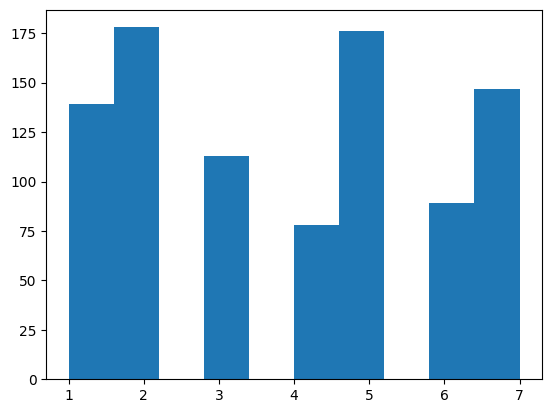

F1 score with hold-out test dataset : 123


In [ ]:
# Implement your test set predicition in here

df_test = pd.read_csv('mex_features_test_no_labels.csv')
X_test = df_test.values
#columns_to_drop = ['subject_id', 'exercise']
#X_test = test_df.drop(columns=columns_to_drop, axis=1).values()
print(X_test.shape)
print(type(X_test))

# Train best model
mdl = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="linear", class_weight="balanced"))
])
mdl.fit(X_train, y_train)

# Predict and score
yhat = mdl.predict(X_test)
f1_score = 123

plt.hist(yhat)
plt.show()



In [ ]:
# Save predictions as json for submission
import json

# Convert to dictionary with string keys and Python ints
# Assuming your predictions are in numpy array "y_pred"
pred_dict = {str(i): int(y_pred[i]) for i in range(len(y_pred))}
with open('submission.json', 'w') as f:
    json.dump(pred_dict, f)